# CS 234 Final Project – Women in Music
## Question 3: Gender of Artists in Spotify
__Author: Data Byte (Clara Kim, Jackeline Lopez Ruiz, and Francisca Moya Jimenez).__

Date: 11-28-2020

Our project explores representation of women in music, specifically representation of female artists in Spotify. Spotify does not provide the gender of the artists in their catalogue, so in order to be able to investigate female artists representation on Spotify, we explored alternative ways of collecting data on the gender of popular artists. 

Our first approach was retrieving the artists' gender from Wikidata. Wikidata is a free and open knowledge base that acts as a central storage for other Wikimedia projects, including Wikipedia. Our second approach was to use crowdsource knowledge from user-created Spotify playlists to label artists as 'female' or 'male'. Since we were mainly interested in contrasting the proportion of female artists versus the proportion of male artists, we decided to focus on these two genders.  


### 1. Asking an Interesting Question
Our goal is to develop and assess two methods to retrieve Spotify artists' gender. Data scientists often need to recurr to creative methods to collect "missing data", as it is the case with the gender of these artists. There is not a free API available that can be used to retrieve this information. We aim to help visualize the process of collecting this missing data, as indicated by one of the principles of *_Data Feminism_*, a book written by Catherine D'Ignazio and Lauren F. Klein. D'Ignazio and Klein propose that data scientists should help visualize their work so this invisible labor can be recognized and valued.

### 2. Retrieving gender through Wikidata.

We will use the Spotipy library to retrieve two playlists, "Top Female Artists of 2020" and "Top Male Artists of 2020". We will use these playlists to test our function that retrieves the gender of a list of artists.

We start by setting up an object to communicate with the Spotify API.

In [2]:
import spotipy 

CLIENT_ID = "34d5e765ac1a4d2dab3ca477a1c69b89"
CLIENT_SECRET = "1e8a41ec803c4a52a060a49e733476dd"

from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= CLIENT_ID,
                                                           client_secret= CLIENT_SECRET))

We retrieved the playlist IDs from the Spotify web application. We use these IDs to retrieve the playlists.

In [3]:
# IDs
maleID = '37i9dQZF1DX9Xg1GNpN7Fl'
femaleID = '37i9dQZF1DWV50ly9XYOua'

# Playlists
malePlaylist = sp.playlist_items(maleID)
femalePlaylist = sp.playlist_items(femaleID)

According to how the Wikidata API works, we need the artists' names to be able to retrieve their gender. Thus, we will create a set of functions to extract the relevant information from the playlist objects we retrieved from the Spotify API.

We start by creating a function to retrieve all of the artists' IDs for a given playlist.

In [4]:
def allArtistsID(playlist):
    """Returns a list with all of the unique artists' IDs for a given playlist"""
    allArtists = []
    for item in playlist['items']:
        artists = [a['id'] for a in item['track']['artists']]
        allArtists.extend(artists)
    
    allArtists = list(set(allArtists))
    return allArtists

femaleID = allArtistsID(femalePlaylist)
maleID = allArtistsID(malePlaylist)

We create two functions to help retrieve the artists' name.

In [5]:
import math

def artistsInfo(idList):
    """Returns a list of dictionaries with the information for each artist from a
    list returned by allArtistsID"""
    artistsInfo = []

    for i in range(math.ceil(len(idList)/50)):
        partialList = idList[i*50: (i+1)*50]
        results = sp.artists(partialList)
        artistsInfo.extend(results['artists'])
        
    return artistsInfo

In [6]:
def getArtistInfo(artistList):
    """Given a list of artists returned by the artistsInfo function, extracts name for each artist."""
    artists = []
    for item in artistList:
        name = item['name']
        artists.append((name))
        
    return artists

We will use the function to create two lists, one with all of the artists on the "Top Female Artists of 2019", and another one with all of the artists on the "Top Male Artists of 2019"

In [7]:
# Female Artists
fArtists = getArtistInfo(artistsInfo(femaleID))

# Male Artists
mArtists = getArtistInfo(artistsInfo(maleID))

We will use the pywikibot library to interact with the Wikidata API. Based on the instructions found here: https://www.wikidata.org/wiki/Wikidata:Pywikibot_-_Python_3_Tutorial/Data_Harvest, we wrote the following function to retrieve a person's gender given a name.


In [9]:
import pywikibot as pw

def getGender(artistName):
    """Retrieves a string indicating a given artist's gender if that information is available 
    on Wikidata. Returns None if the artist's gender is not available"""
    siteWiki = pw.Site("en", "wikipedia")
    try:
        # Retrieving Wikidata artist's ID
        pageWiki = pw.Page(siteWiki, artistName)
        itemWiki = pw.ItemPage.fromPage(pageWiki)
        artistID = itemWiki.getID()

        # Retrieving artist's gender
        site = pw.Site("wikidata", "wikidata")
        repo = site.data_repository()
        item = pw.ItemPage(repo, artistID)
        item_dict = item.get()
        gender = item_dict['claims']['P21']
        return gender[0].getTarget().labels["en"]
    except:
        gender = None
        
    return gender

We can look at the gender of the artists in the "Top Male Artists of 2019" playlist.

In [10]:
malePGender = {}
for artist in mArtists:
    malePGender[artist] = getGender(artist)
    print(artist,':',malePGender[artist])

Ed Sheeran : male
Shawn Mendes : male
J Balvin : male
Sebastian Yatra : None
Khalid : None
J. Cole : male
BTS : None
Nicky Jam : male
Justin Bieber : male
Juice WRLD : None
Kygo : male
Queen : None
Drake : None
Travis Scott : male
Maroon 5 : None
Avicii : male
Twenty One Pilots : None
Anuel AA : male
Calvin Harris : male
Lil Nas X : male
Lauv : male
Kendrick Lamar : male
Alan Walker : None
Future : None
Kanye West : male
Sabrina Carpenter : female
Maluma : male
Daddy Yankee : male
The Weeknd : male
David Guetta : male
Panic! At The Disco : None
Marshmello : male
Post Malone : male
XXXTENTACION : None
The Beatles : None
Farruko : male
The Chainsmokers : None
Brooks : None
Ozuna : None
Eminem : male
Diplo : male
Sech : None
Chris Brown : male
Rag'n'Bone Man : male
Bastille : None
Tyga : male
Coldplay : None
Snow : None
Imagine Dragons : None
Bad Bunny : male
Morgan Wallen : male
Swae Lee : male
A Boogie Wit da Hoodie : None
Whitney Houston : female
5 Seconds of Summer : None
Paulo Londra

In [226]:
malePGender.values()

dict_values(['male', 'male', 'male', None, None, 'male', None, 'male', 'male', None, 'male', None, None, 'male', None, 'male', None, 'male', 'male', 'male', 'male', 'male', None, None, 'male', 'female', 'male', 'male', 'male', 'male', None, 'male', 'male', None, None, 'male', None, None, None, 'male', 'male', None, 'male', 'male', None, 'male', None, None, None, 'male', 'male', 'male', None, 'female', None, 'male', None, 'male'])

From this data, we can notice that there are female artists and groups of artists such as Whitney Houston in the "Top Male Artists of 2019" playlist. This is because some of the songs in the playlists were features of male artists with other artists. We can also notice that the API did not find the gender for a large number of artists. By reading the pywikidata documentation, we noticed that Wikidata takes a Wikipedia page as a reference. If the name provided to the API does not match exactly the Wikipedia page for an artist, it will not be able to find the Wikidata page for that artist. 

We decided to use mwclient, a library to the MediaWiki API, to search for the Wikipedia pages for a given artist and then use the Wikipedia page name found to get the gender of a given artist.

In [25]:
import mwclient as mw

def getPageFromWiki(name):
    """Returns the first page for an artist given a name"""
    wiki = mw.Site('en.wikipedia.org')
    allPages = wiki.allpages(name+(' (singer)'))
    return allPages.next().resolve_redirect().name

In [34]:
def getGenderV2(name):
    """Retrieves a string indicating a given artist's gender if that information is available 
    on Wikidata. If the page for a given artist does not exist, it searches Wikipedia to find
    the appropiate Wikidata page. Returns None if the artist's gender is not available"""
    gender = getGender(name)
    if gender == None:
        newName = getPageFromWiki(name)
        gender = getGender(newName)
    return gender
        

We can look at the gender of the artists in the "Top Male Artists of 2019" playlist retrieved using our new function `getGenderV2`

In [36]:
malePGenderV2 = {}
for artist in mArtists:
    malePGenderV2[artist] = getGenderV2(artist)
    print(artist,':',malePGenderV2[artist])

Ed Sheeran : male
Shawn Mendes : male
J Balvin : male
Sebastian Yatra : None
Khalid : male
J. Cole : male
BTS : None
Nicky Jam : male
Justin Bieber : male
Juice WRLD : None
Kygo : male
Queen : None
Drake : male
Travis Scott : male
Maroon 5 : None
Avicii : male
Twenty One Pilots : None
Anuel AA : male
Calvin Harris : male
Lil Nas X : male
Lauv : male
Kendrick Lamar : male
Alan Walker : male
Future : male
Kanye West : male
Sabrina Carpenter : female
Maluma : male
Daddy Yankee : male
The Weeknd : male
David Guetta : male
Panic! At The Disco : None
Marshmello : male
Post Malone : male
XXXTENTACION : None
The Beatles : None
Farruko : male
The Chainsmokers : None
Brooks : None
Ozuna : male
Eminem : male
Diplo : male
Sech : male
Chris Brown : male
Rag'n'Bone Man : male
Bastille : None
Tyga : male
Coldplay : None
Snow : male
Imagine Dragons : None
Bad Bunny : male
Morgan Wallen : male
Swae Lee : male
A Boogie Wit da Hoodie : None
Whitney Houston : female
5 Seconds of Summer : None
Paulo Londra

We can see that we were able to retrieve the gender of artists that we did not have before, such as Ozuna and Drake, who are male. However, we see that there is still some missing data. We can visualize the percentage of artists for whom we found gender for each method.

We will start by creating a conter dictionary to count the frequency of female artists, male artists, and artists whose gender could not be categorized (None) for each each method: Wikidata API and Wikidata + Wikipedia APIs. From looking at the artists, we know that two of artists in the Top Male Artists 2019 playlist are female, specifically Sabrina Carpenter and Whitney Houston. These artists were correctly identified as female by the two methods.

In [257]:
from collections import Counter
firstFreq = Counter(malePGender.values())
secondFreq = Counter(malePGenderV2.values())

In [258]:
dataDict = {}
dataDict['Wikidata'] = firstFreq
dataDict['Wikidata + Wikipedia'] = secondFreq

In [259]:
import pandas as pd

df = pd.DataFrame(data=dataDict)
df.rename(index={None:'none'}, inplace=True)

In [260]:
df2 = df.transpose()

In [261]:
df2

,male,none,female
Wikidata,32,24,2
Wikidata + Wikipedia,39,17,2


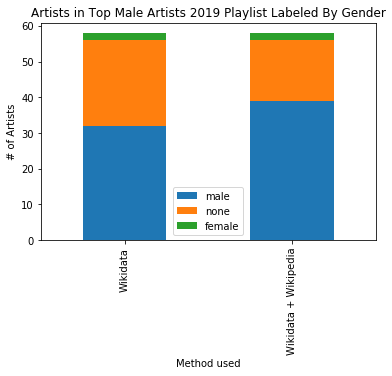

In [266]:
from matplotlib import pyplot as plt
df2.plot(kind='bar', stacked=True)
plt.title('Artists in Top Male Artists 2019 Playlist Labeled By Gender')
plt.xlabel('Method used')
plt.ylabel('# of Artists')
plt.show()

### 2. Retrieving gender by crowdsourcing Spotify

As we saw earlier, we can not rely on Wikidata to retrieve the gender of any artist. This was our motivation for searching for another way to be able to collect this missing data. We decided to use the crowdsource knowledge of Spotify's users to be able to classify artists as male or female. We will create an archive of Spotify playlists that have names that include "female artist" or "male artist", and we will classify artists as female or male if enough people have labelled them as female or male. We will do this by counting the times they appear in playlists labeled as "female artist" versus the number of times they appear in playlists labeled as "male artist".  

First, we need to create a function that retrieves the IDs of 200 playlists associated with a given string from the Spotify API.

In [142]:
def getPlaylists(wordsList, num):
    """Returns all of the playlists IDs from Spotify related for a given query to the Spotify API"""
    playlistIDs = []
    for word in wordsList:
        results = sp.search(q=word, type='playlist', limit=50)
        playlistIDs.extend([resID['id'] for resID in results['playlists']['items']])
        offset = len(results['playlists']['items'])
        while len(playlistIDs)<num:
            results = sp.search(q=word, type='playlist', limit=50, offset=offset)
            playlistIDs.extend([resID['id'] for resID in results['playlists']['items']])
            offset = offset + len(results['playlists']['items'])
    return playlistIDs

We will collect the IDs of 200 playlists associated with the name "female artist" and 200 playlists associated with the name "male artist".

In [197]:
femalePlaylists = getPByName(['female artist','female singer'],200)
malePlaylists = getPByName(['male artist','male singer'],200)

print('female playlists retrieved:',len(femalePlaylists),', male playlists retrieved:',len(malePlaylists))

female playlists retrieved: 400 , male playlists retrieved: 400


We will now create a function to return a dictionary that has the playlists' IDs as keys and the a list of artists for each playlist as values. We will use this function to then check in how many playlists a given artist is.

In [39]:
def allArtistsID(playlist):
    """Returns a list with all of the unique artists' IDs for a given playlist"""
    playlist = sp.playlist_items(playlist)
    allArtists = []
    for item in playlist['items']:
        try:
            artists = [a['id'] for a in item['track']['artists']]
            allArtists.extend(artists)
        except:
            pass
    
    allArtists = list(set(allArtists))
    return allArtists

In [144]:
def playArtistDict(idList):
    """Returns a dictionary of artists IDs for a given list of playlists"""
    return {playlist: allArtistsID(playlist) for playlist in idList}

Creating the dictionary containing all female playlists and artists, and a dictionary containing all male playlists and artists.

In [201]:
femalePlay = playArtistDict(femalePlaylists)
malePlay = playArtistDict(malePlaylists)

392

In [203]:
print('female playlists:',len(femalePlay))
print('male playlists:',len(malePlay))

female playlists: 392
male playlists: 397


We can see that some playlists found were repeated. In order to keep proportions equal, we'll eliminate the 5 last playlists from the male playlist dictionary (which we know are the less relevant).

In [204]:
for i in range(5):
    malePlay.popitem()

In [206]:
print('male playlists:',len(malePlay))

male playlists: 392


We can now define the function that will classify artists' gender as male or female.

In [216]:
def genderClassif(artist):
    """Given an artist name returns male, female, or None according to how many times the
    artist appears on female playlists versus male artists"""
    counterMale = 0
    counterFemale = 0
    for playlist in malePlay.keys():
        if artist in malePlay[playlist]:
            counterMale += 1
    for playlist in femalePlay.keys():
        if artist in femalePlay[playlist]:
            counterFemale += 1
    if counterMale+3 > counterFemale:
        return 'male'
    elif counterFemale+3 > counterMale:
        return 'female'
    else:
        return None

We will extract the name and id for each artist in the "Top Female Artists of 2019" and "Top Male Artists of 2019" playlists to obtain their gender through our gender classifier function. 

In [209]:
def getArtistInfoID(artistList):
    """Given a list of artists returned by the artistsInfo function, extracts name and ID for each artist."""
    return [(item['name'], item['id']) for item in artistList]

In [210]:
topFemaleArtists = getArtistInfoID(artistsInfo(femaleID))
topMaleArtists = getArtistInfoID(artistsInfo(maleID))

Obtaining gender:

In [222]:
for artist in topFemaleArtists:
    print(artist[0],'gender:',genderClassif(artist[1]))

TWICE gender: female
Madonna gender: female
Miley Cyrus gender: female
Selena Gomez gender: female
Lana Del Rey gender: female
J Balvin gender: female
Kehlani gender: female
SZA gender: female
Dua Lipa gender: female
KAROL G gender: female
Lady Gaga gender: female
Mabel gender: female
Bebe Rexha gender: female
Natti Natasha gender: female
P!nk gender: female
Little Mix gender: female
Billie Eilish gender: female
Nicki Minaj gender: female
Ava Max gender: female
Hailee Steinfeld gender: female
Taylor Swift gender: female
Katy Perry gender: female
BLACKPINK gender: female
Rita Ora gender: female
Fleetwood Mac gender: female
Jess Glynne gender: female
Alessia Cara gender: female
Anne-Marie gender: female
Adele gender: female
Beyoncé gender: female
Marília Mendonça gender: female
Zara Larsson gender: female
Black Eyed Peas gender: male
Britney Spears gender: female
Julia Michaels gender: female
Normani gender: male
Shakira gender: female
Halsey gender: female
Demi Lovato gender: female
Ell

In [223]:
for artist in topMaleArtists:
    print(artist[0],'gender:',genderClassif(artist[1]))

Ed Sheeran gender: male
Shawn Mendes gender: male
J Balvin gender: female
Sebastian Yatra gender: male
Khalid gender: male
J. Cole gender: male
BTS gender: male
Nicky Jam gender: male
Justin Bieber gender: male
Juice WRLD gender: male
Kygo gender: male
Queen gender: male
Drake gender: male
Travis Scott gender: male
Maroon 5 gender: male
Avicii gender: male
Twenty One Pilots gender: male
Anuel AA gender: male
Calvin Harris gender: male
Lil Nas X gender: male
Lauv gender: male
Kendrick Lamar gender: male
Alan Walker gender: male
Future gender: male
Kanye West gender: male
Sabrina Carpenter gender: female
Maluma gender: female
Daddy Yankee gender: male
The Weeknd gender: male
David Guetta gender: male
Panic! At The Disco gender: male
Marshmello gender: male
Post Malone gender: male
XXXTENTACION gender: male
The Beatles gender: male
Farruko gender: male
The Chainsmokers gender: male
Brooks gender: male
Ozuna gender: male
Eminem gender: male
Diplo gender: female
Sech gender: male
Chris Brow

We can see that the Spotify gender classifier provides relevant information, but is not completely accurate with artists that are among the most popular artists in Spotify, such as Bad Bunny. Thus, we will take a two-step approach to labeling the gender of the artists. We will start by retrieving the data from Wikidata using the improved function that first makes a call to the Wikipedia API to retrieve the correct Wikipedia page for each artist. Then, we will use the Spotify crowdsourcing method to get our missing data, which we will check for accuracy. 

### 4. Data Classification Process
As part of our research question, we decided to look at the proportion of female versus male artists in one of the top Spotify playlists, Today's Top Hits. We downloaded the playlist's data from May 2019 to November 2020. We accessed the data from a Github user's repository: https://github.com/mackorone/spotify-playlist-archive/tree/master/playlists

In [174]:
import csv

allFiles = ['may2019', 'june2019-1', 'june2019-2', 'july2019-1', 'july2019-2', 
                'august2019-1', 'august2019-2', 'september2019-1', 'september2019-2',
                'october2019-1', 'october2019-2', 'november2019-1', 'november2019-2',
                'december2019-1', 'december2019-2', 'january2020-1', 'january2020-2',
                'february2020-1', 'february2020-2', 'march2020-1', 'march2020-2',
                'april2020-1', 'april2020-2', 'may2020-1', 'may2020-2', 'june2020-1',
                'june2020-2', 'july2020-1', 'july2020-2', 'august2020-1', 'august2020-2',
                'september2020-1', 'september2020-2', 'october2020-1', 'october2020-2',
                'november2020-1', 'november2020-2']

allArtists = []


for name in allFiles:
    with open('/Users/francisca/Desktop/CS 234/databyte_csvfiles/'+ name + '.csv', mode='r') as infile:
        csv_reader = csv.reader(infile, delimiter=',')
        for lines in csv_reader:
            if lines[2] != 'artists':
                if ',' in lines[2]:
                    artists = []
                    a = lines[2].split(', ')
                    allArtists.extend(a)
                else:
                    allArtists.append(lines[2])

We want to create a dictionary storing all of the artists in this playlist over time and their gender as determined by our gender classifier. We first create a list with unique artists.

In [178]:
uniqueArtists = list(set(allArtists))
print('There is a total of', len(uniqueArtists), 'unique artists.')

There is a total of 319 unique artists.


In order to classify the artists, we need their Spotify ids. Therefore, we retrieve their ids from the Spotify API.

In [284]:
aDict = {}
for artist in uArtists:
    results = sp.search(q=artist, type='artist')
    aId = results['artists']['items'][0]['id']
    aDict[artist] = aId

We can check that we have the 319 artists in our dictionary.

In [294]:
len(aDict.keys())

319

Now we will define a function that stores the name and the gender of each artist in our list.

In [295]:
def genderDict(artistDict):
    """Given a dictionary of names as keys and artist ids as values returns a dictionary of names
    and gender for each artist"""
    genderDict = {}
    for artist in artistDict:
        gender = getGenderV2(artist)
        if gender == None:
            gender = genderClassif2(artistDict[artist])
        genderDict[artist] = gender
    return genderDict

In [342]:
aGenderDict = genderDict(aDict)

We will store this data in a json file to use in our hypothesis testing to analyze proportion of female to male artists in Spotify.

In [298]:
import json

with open('artistsGenderFinal.json','w') as outfile:
    json.dump(aGenderDict, outfile)

### 4. Apendix: Band Classifier
We tried to develop a band classifier from crowdsourcing Spotify similar to the gender classifier we developed above. However, we realized that there isn't enough band-specific playlists to get a significant sample of playlists that only have bands. Thus, we decided to delete bands manually to make sure that we were not deleting relevant artists from the playlist. 

We start by modifying our getPlaylists function to retrieve a number of playlists that we will determine.

In [268]:
def getPlaylistsByName(wordsList, num):
    """Returns all of the playlists IDs from Spotify related for a given query to the Spotify API"""
    allIDs = []
    for word in wordsList:
        playlistIDs = []
        results = sp.search(q=word, type='playlist', limit=50)
        playlistIDs.extend([resID['id'] for resID in results['playlists']['items']])
        offset = len(results['playlists']['items'])
        while len(playlistIDs)<num:
            results = sp.search(q=word, type='playlist', limit=50, offset=offset)
            playlistIDs.extend([resID['id'] for resID in results['playlists']['items']])
            offset = offset + len(results['playlists']['items'])
        allIDs.extend(playlistIDs)
    return allIDs

The API search for top group doesn't retrieve more than 50 playlists, thus we will add a few more categories to retrieve a total of 150 playlists.

In [269]:
bandPlaylists = getPlaylistsByName(['top groups','boy bands','girl bands'],50)

In [270]:
len(bandPlaylists)

150

We will now get the artist IDs for each playlist. However, we can notice that some of the playlists were repeated, and thus we will now have a total of 137 playlists.

In [153]:
bandIDs = playArtistDict(bandPlaylists)

In [272]:
len(bandIDs.keys())

137

We can look at the number of playlists the artists in our Top Female Artists are,

In [273]:
def bandClassif(artist):
    counter = 0
    for playlist in bandIDs.keys():
        if artist in bandIDs[playlist]:
            counter += 1
            
    return counter

In [274]:
for artist in topFemaleArtists:
    band = bandClassif(artist[1])
    print(artist[0],'/',band)

TWICE / 24
Madonna / 10
Miley Cyrus / 4
Selena Gomez / 7
Lana Del Rey / 2
J Balvin / 6
Kehlani / 1
SZA / 1
Dua Lipa / 4
KAROL G / 2
Lady Gaga / 10
Mabel / 2
Bebe Rexha / 3
Natti Natasha / 0
P!nk / 10
Little Mix / 17
Billie Eilish / 3
Nicki Minaj / 10
Ava Max / 3
Hailee Steinfeld / 2
Taylor Swift / 5
Katy Perry / 4
BLACKPINK / 28
Rita Ora / 2
Fleetwood Mac / 9
Jess Glynne / 1
Alessia Cara / 1
Anne-Marie / 2
Adele / 4
Beyoncé / 6
Marília Mendonça / 0
Zara Larsson / 4
Black Eyed Peas / 7
Britney Spears / 18
Julia Michaels / 1
Normani / 0
Shakira / 5
Halsey / 14
Demi Lovato / 8
Ellie Goulding / 1
Cardi B / 5
Camila Cabello / 2
Freshlyground / 0
Clean Bandit / 6
Lizzo / 1
Becky G / 2
ROSALÍA / 0
Bad Bunny / 1
Sia / 3
Ariana Grande / 2
Whitney Houston / 6
Anitta / 0
Rihanna / 6


We can notice that there is not a significant difference between the number of playlists that popular bands such as TWICE (24) and Little Mix (17) appear and the number of playlists that well-known artists such as Britney Spears (18) appears. We want to make sure that we don't missclasify relevent artists such as Britney Spears or Lady Gaga, and that we are able to recognize less mainstream bands such as Freshlyground. Thus, we decided to manually review the list of artists to remove bands from our Today's Top Hits gender dictionary.

Deleting bands:

In [361]:
bandsDel = ["Goodboys","A R I Z O N A","Peach Tree Rascals","Vargas & Lagola","Disclosure",\
         "MEDUZA","CHVRCHES","Clean Bandit","SHAED","Major Lazer","5 Seconds of Summer",\
         "Surfaces","Wallows","BROCKHAMPTON","Panic! At The Disco","Twenty One Pilots",\
         "Social House","Internet Money","Maroon 5","OneRepublic","Black Eyed Peas","LANY",\
         "A Touch Of Class","Quarterhead","Death Stranding: Timefall","THE SCOTTS","BLACKPINK",\
         "BTS","Fall Out Boy","Coldplay","Ofenbach","The Neptunes","The Black Eyed Peas",\
         "Dan + Shay","A Day To Remember","Why Don't We"]

In [363]:
len(bandsDel)

36

In [373]:
for band in bandsDel:
    del aGenderDict[band]

Saving the dictionary into a json file:

In [375]:
import json

with open('artistsGender.json','w') as outfile:
    json.dump(aGenderDict, outfile)

In [357]:
aGenderDict['JAY Z'] = 'male'
aGenderDict['RAYE'] = 'female'
aGenderDict['Alida'] = 'female'
aGenderDict['iann dior'] = 'male'
aGenderDict['SUGA'] = 'male'
aGenderDict['salem ilese'] = 'female'
aGenderDict['Gunna'] = 'male'
aGenderDict['Anitta'] = 'female'
aGenderDict['Emilee'] = 'female'
aGenderDict['RANI'] = 'female'
aGenderDict['R3HAB'] = 'male'
aGenderDict['J. Rey Soul'] = 'female'
aGenderDict['FKA twigs'] = 'female'

We will create dataframes from the artists' data to be able to analyze the data.

In [9]:
import pandas as pd

dfRb = pd.DataFrame(data= rbData, columns=['id', 'name', 'popularity', 'genres', 'followers'])
dfHiphop = pd.DataFrame(data= hiphopData, columns=['id', 'name', 'popularity', 'genres', 'followers'])
dfCountry = pd.DataFrame(data= countryData, columns=['id', 'name', 'popularity', 'genres', 'followers'])

In [367]:
# Clara

def genderDict2(artistDict):
    """Given a dictionary of names as keys and artist ids as values returns a dictionary of names
    and gender for each artist"""
    genderDict = {}
    for artist in artistDict:
        gender = getGenderV2(artist)
        if gender == None:
            gender = genderClassif2(artistDict[artist])
        genderDict[artist] = [gender, artistDict[artist]]
    return genderDict

In [368]:
aGenderDict2 = genderDict2(aDict)

In [371]:
aGenderDict2['JAY Z'] = ['male','3nFkdlSjzX9mRTtwJOzDYB']
aGenderDict2['RAYE'] = ['female', '5KKpBU5eC2tJDzf0wmlRp2']
aGenderDict2['Alida'] = ['female', '1kiq2kUV0cbLUhJsr7cpW0']
aGenderDict2['iann dior'] = ['male', '6ASri4ePR7RlsvIQgWPJpS']
aGenderDict2['SUGA'] = ['male', '0ebNdVaOfp6N0oZ1guIxM8']
aGenderDict2['salem ilese'] = ['female', '3QJUFtGBGL05vo0kCJZsmT']
aGenderDict2['Gunna'] = ['male', '2hlmm7s2ICUX0LVIhVFlZQ']
aGenderDict2['Anitta'] = ['female', '7FNnA9vBm6EKceENgCGRMb']
aGenderDict2['Social House'] = ['male', '5UjifI1TYefXWn9GdqDOHl']
aGenderDict2['Emilee'] = ['female', '4ArPQ1Opcksbbf3CPwEjWE']
aGenderDict2['RANI'] = ['female','3SYnDj7btg9gFY7ps8m5d5']
aGenderDict2['R3HAB'] = ['male','6cEuCEZu7PAE9ZSzLLc2oQ']
aGenderDict2['J. Rey Soul'] = ['female', '1OB278sOZVSFx5vXqYha83']
aGenderDict2['FKA twigs'] = ['female', '6nB0iY1cjSY1KyhYyuIIKH']